In [1]:
#
#
#       2020.11.23 
#       Heesung Yang
#       Linear Discriminant Analysis
#       Env : lisa master(single node)
#
#

In [14]:
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

In [15]:
# Training data set (binary class)
N = 100

m1 = np.mat([0, 0]) # mu 1
s1 = np.mat([[9, 0], [0, 1]])   # Cov 1

m2 = np.mat([0, 4]) # mu2
s2 = np.mat([[9, 0], [0, 1]])   # Cov 2(=Cov1)

X1 = np.matmul(np.random.randn(N, 2), sqrtm(s1)) + np.tile(m1, (N, 1))
X2 = np.matmul(np.random.randn(N, 2), sqrtm(s2)) + np.tile(m2, (N, 1))

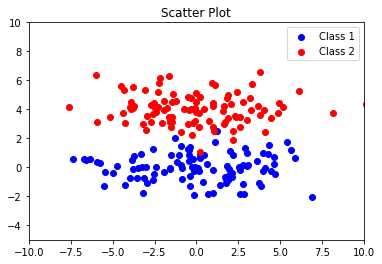

In [16]:
# Plot (scatter)
plt.scatter(np.array(X1[:, 0]), np.array(X1[:, 1]), c='b', label='Class 1')
plt.scatter(np.array(X2[:, 0]), np.array(X2[:, 1]), c='r', label='Class 2')
plt.axis([-10, 10, -5, 10])
plt.legend()
plt.title('Scatter Plot')
plt.show()

In [17]:
# LDA
m1 = np.mean(X1, axis=0)
m2 = np.mean(X2, axis=0)

Sw = N * np.cov(X1.T) + N * np.cov(X2.T)    #WSM
Sb = (m1 - m2).T * (m1 - m2)    # BSM

D, V = np.linalg.eig(np.matmul(Sb, np.linalg.inv(Sw)))  # D : list of e-value, V : eigenvector mat

ldaW = np.mat(V[:, 1])
Z1 = np.matmul(X1, ldaW)    # Projection(Encoding)
Z2 = np.matmul(X2, ldaW)

rX1 = np.matmul(Z1, ldaW.T) # Decoding
rX2 = np.matmul(Z2, ldaW.T)

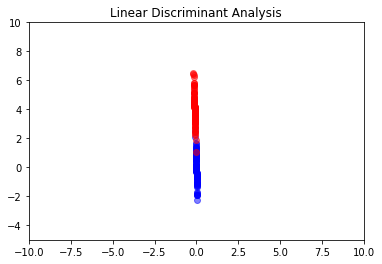

In [18]:
plt.scatter(np.array(rX1[:, 0]), np.array(rX1[:, 1]), c='b', alpha=0.5)
plt.scatter(np.array(rX2[:, 0]), np.array(rX2[:, 1]), c='r', alpha=0.5)
plt.axis([-10, 10, -5, 10])
plt.title('Linear Discriminant Analysis')
plt.show()